# **Introducao à Linguagem R**

**prof: Sergio Assuncao Monteiro, DSc**


*   linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

*   lattes: http://lattes.cnpq.br/9489191035734025

*   github: https://github.com/sergiomonteiro76

# **Análise de Ações da Bovespa**

In [1]:
# Instalando e carregando as bibliotecas necessárias
install.packages("quantmod")
library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# Definindo o ticker da Petrobras
ticker <- "PETR4.SA"  # PETR4.SA é o ticker para a Petrobras na Bovespa

# Definindo o período desejado
start_date <- "2020-01-01"
end_date <- Sys.Date()  # Data atual

In [3]:
# Baixando os dados da Petrobras da Bovespa
getSymbols(ticker, src = "yahoo", from = start_date, to = end_date)

[1] "PETR4.SA"

In [4]:
# Exibindo o dataframe dos preços ajustados
petrobras <- na.omit(Ad(get(ticker)))
head(petrobras)

           PETR4.SA.Adjusted
2020-01-02          11.74874
2020-01-03          11.65307
2020-01-06          11.79084
2020-01-07          11.74492
2020-01-08          11.67220
2020-01-09          11.63393

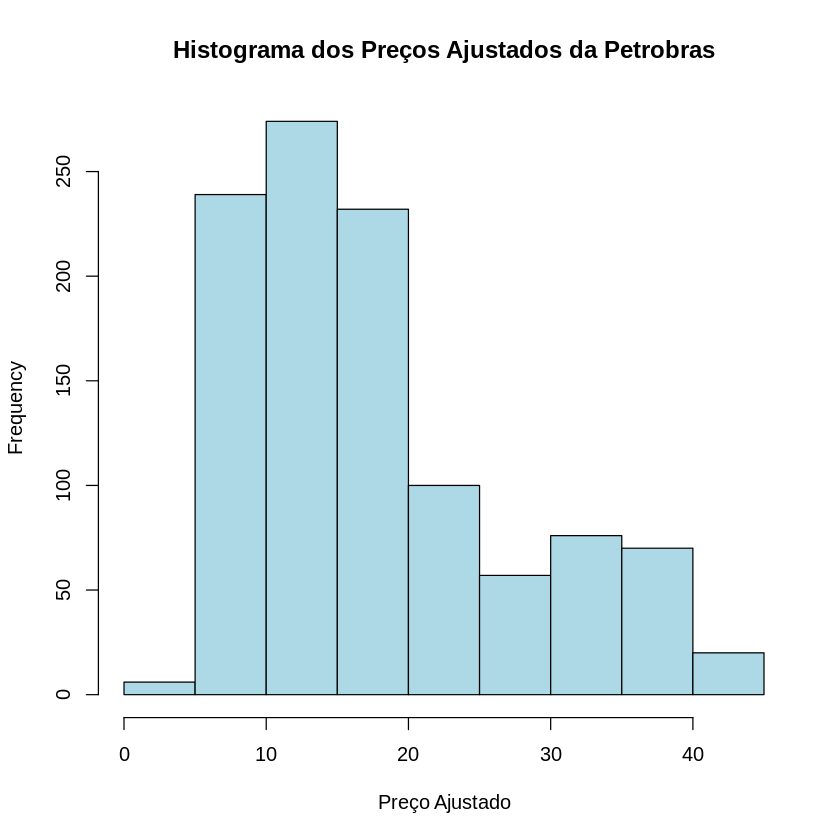

In [5]:
# Criando o histograma dos preços ajustados
hist(petrobras, main = "Histograma dos Preços Ajustados da Petrobras", xlab = "Preço Ajustado", col = "lightblue")

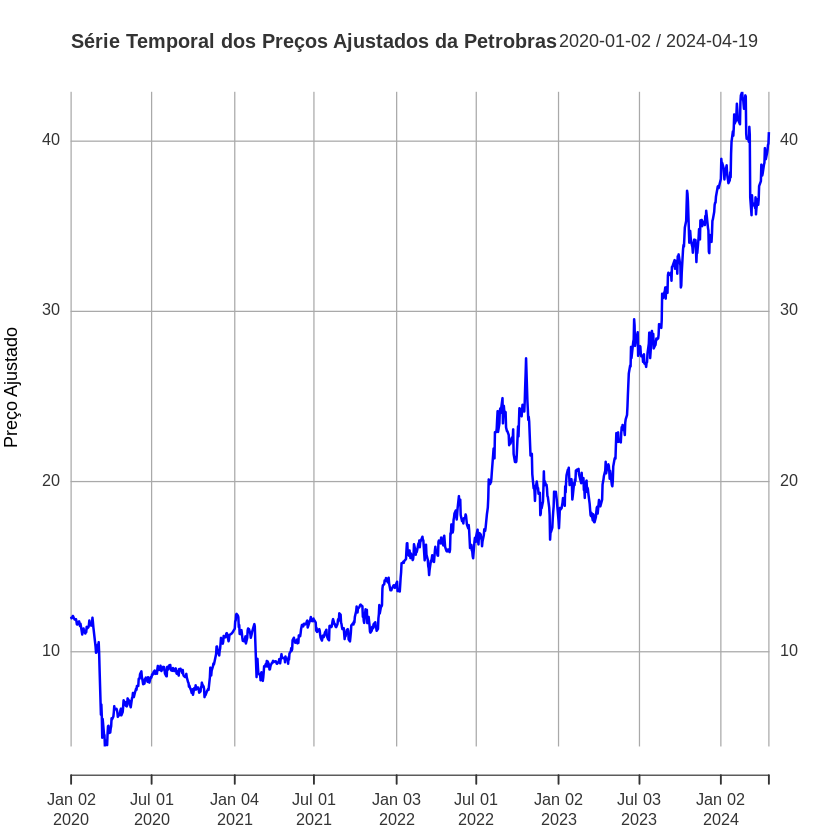

In [ ]:
# Criando a série temporal dos preços ajustados
plot(petrobras, main = "Série Temporal dos Preços Ajustados da Petrobras", ylab = "Preço Ajustado", col = "blue")


# **Análise dos Momentos de Compra e Venda**

In [ ]:
# Instalando e carregando as bibliotecas necessárias
install.packages("quantmod")
library(quantmod)

# Definindo o ticker da Petrobras
ticker <- "PETR4.SA"  # PETR4.SA é o ticker para a Petrobras na Bovespa

# Definindo o período desejado
start_date <- "2020-01-01"
end_date <- Sys.Date()  # Data atual

# Baixando os dados da Petrobras da Bovespa
getSymbols(ticker, src = "yahoo", from = start_date, to = end_date)

# Verificando a estrutura dos dados baixados
str(PETR4.SA)

# Extraindo os preços ajustados
precos_ajustados <- Cl(PETR4.SA)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "PETR4.SA"

An xts object on 2020-01-02 / 2024-04-19 containing: 
  Data:    double [1069, 6]
  Columns: PETR4.SA.Open, PETR4.SA.High, PETR4.SA.Low, PETR4.SA.Close, PETR4.SA.Volume ... with 1 more column
  Index:   Date [1069] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-04-20 10:59:00"


In [ ]:
# Calculando médias móveis de curto e longo prazo
PETR4.SA$SMA20 <- SMA(precos_ajustados, n = 20)
PETR4.SA$SMA50 <- SMA(precos_ajustados, n = 50)


In [ ]:
# Calculando os envelopes de Bollinger
n <- 20  # Período para os envelopes de Bollinger
PETR4.SA$SDB <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$dn
PETR4.SA$SDT <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$up

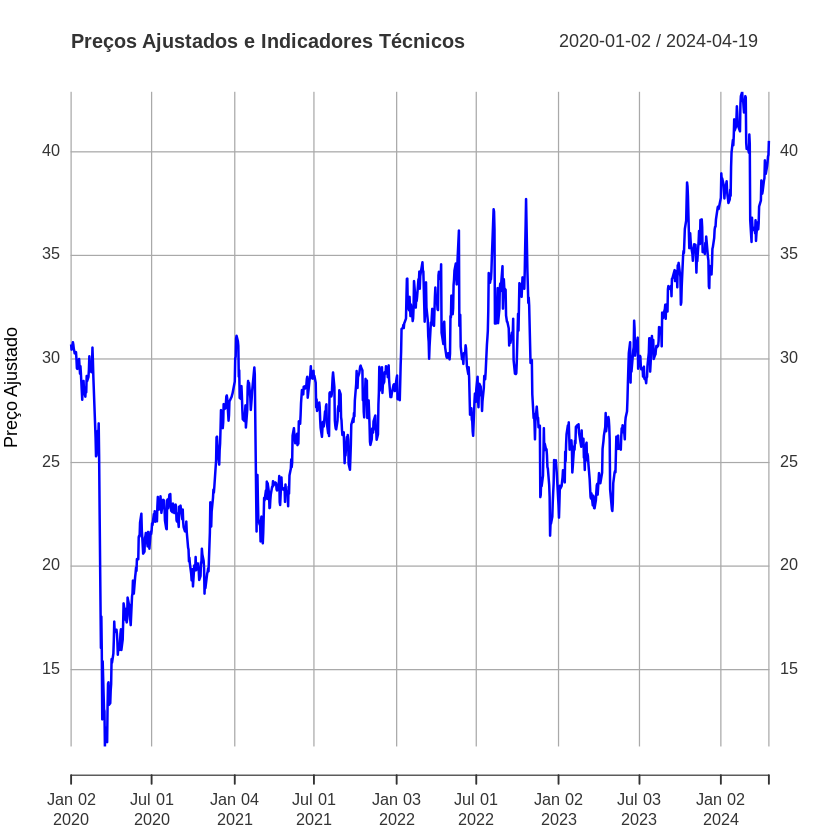

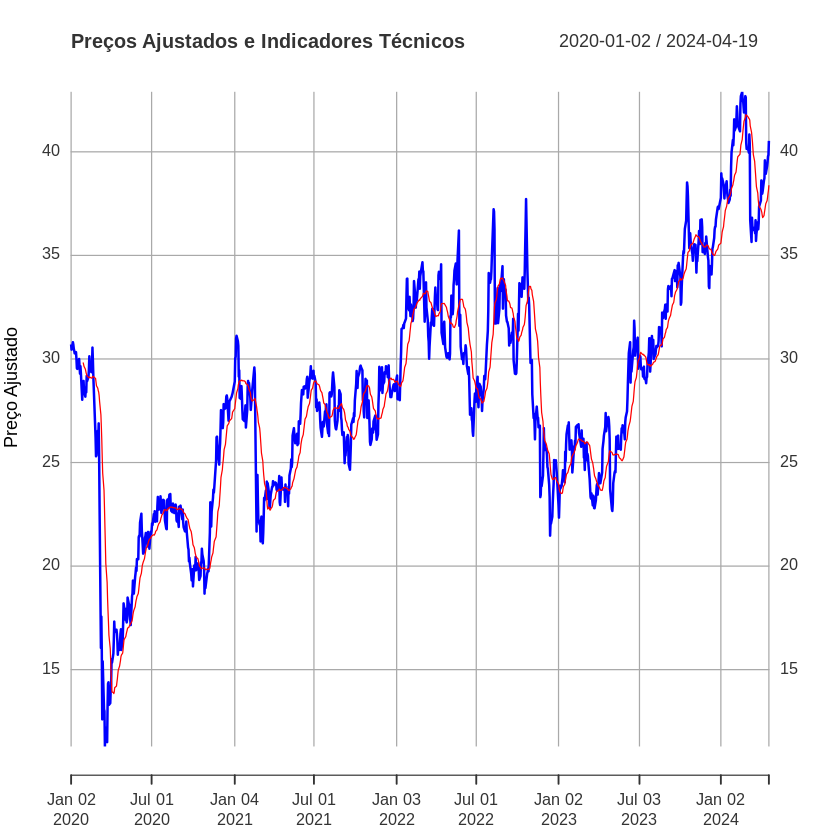

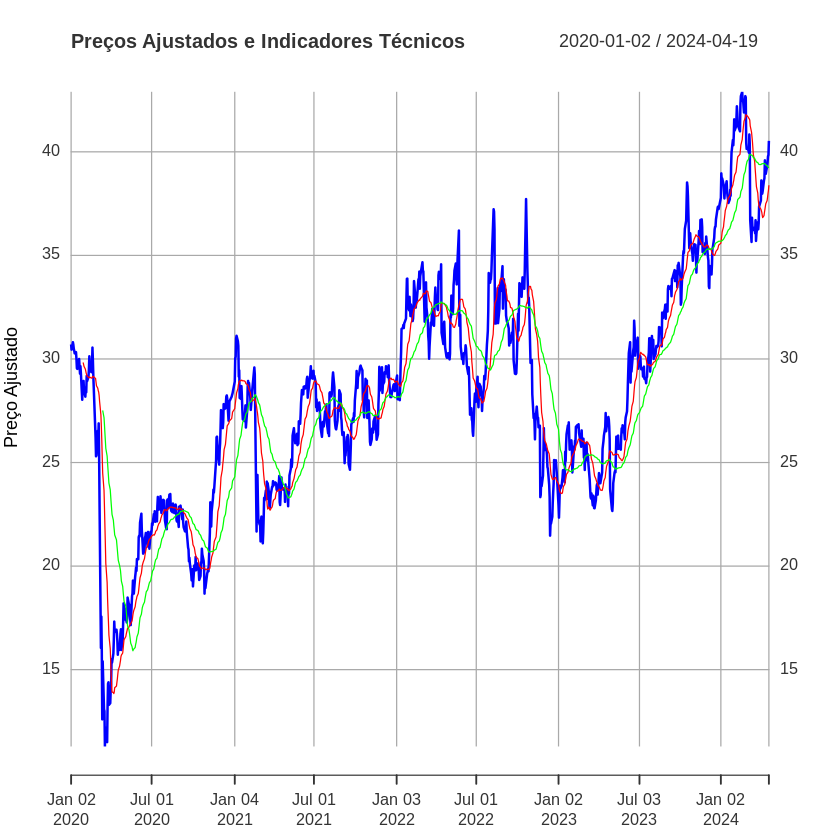

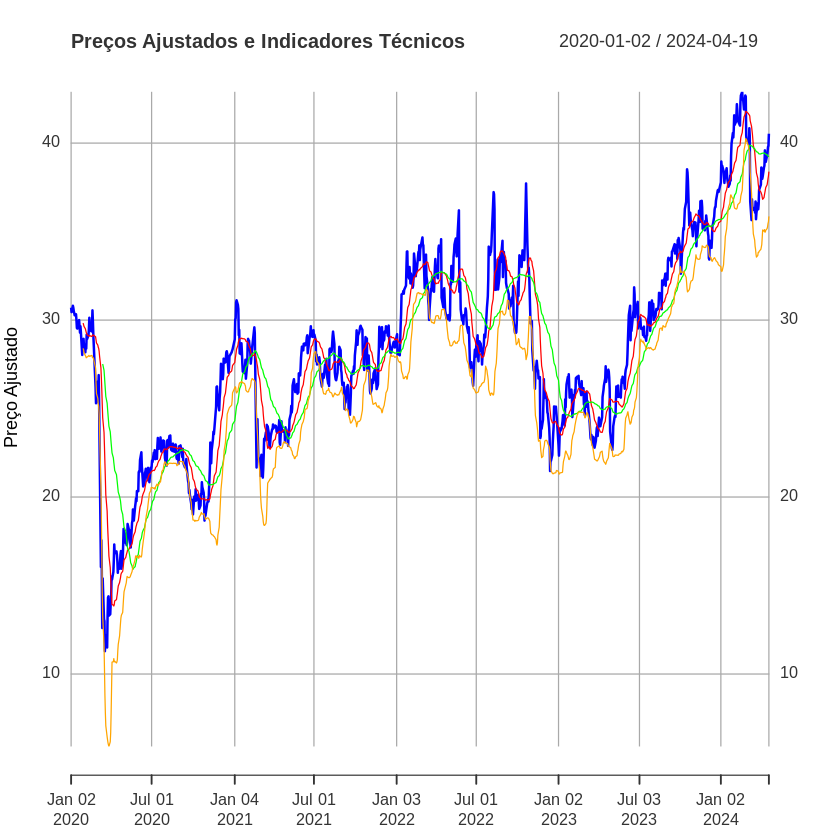

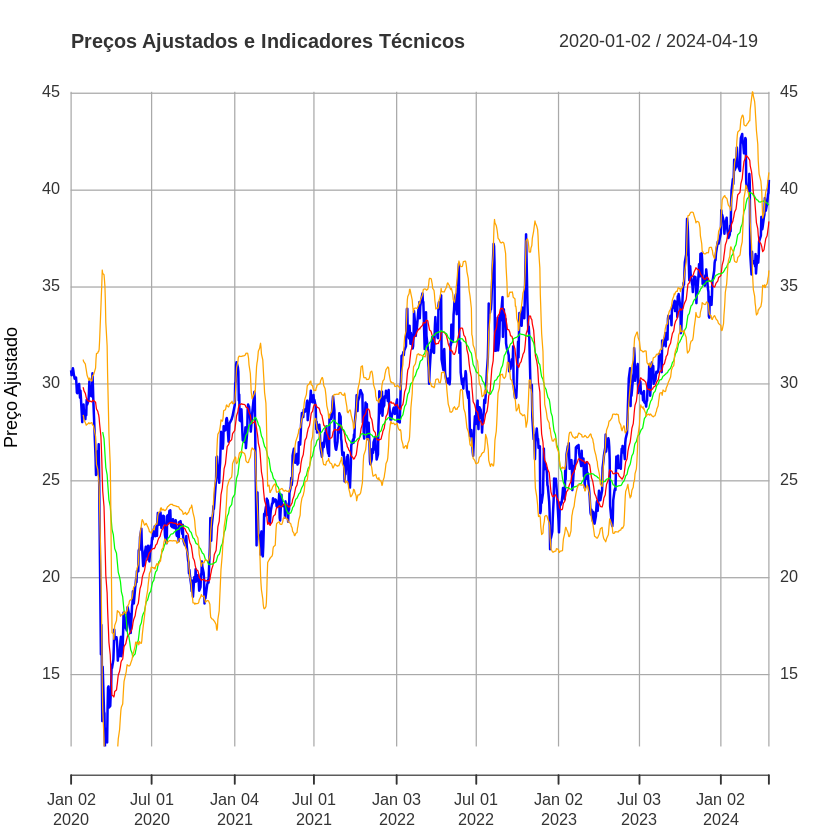

In [ ]:
# Plotando os preços ajustados com médias móveis e envelopes de Bollinger
plot(precos_ajustados, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado")
lines(PETR4.SA$SMA20, col = "red")
lines(PETR4.SA$SMA50, col = "green")
lines(PETR4.SA$SDB, col = "orange")
lines(PETR4.SA$SDT, col = "orange")

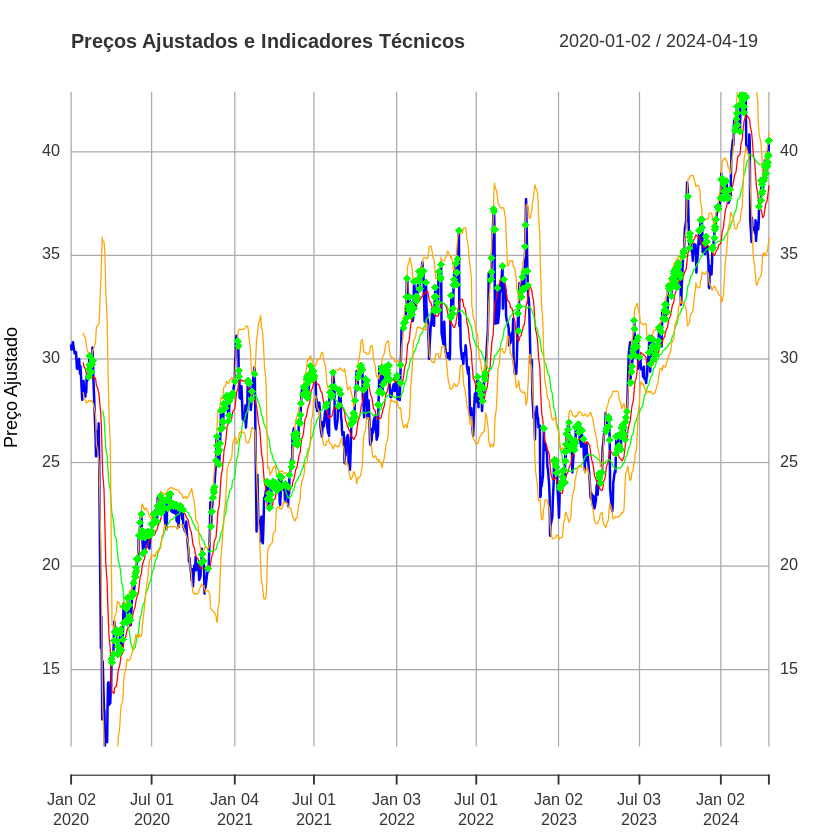

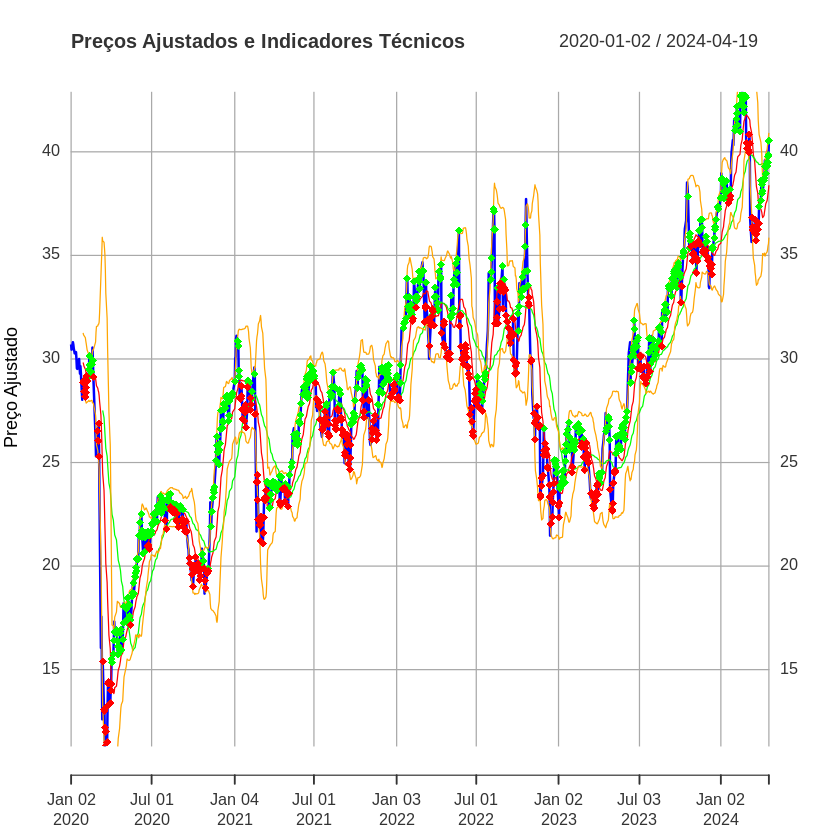

In [ ]:
# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de curto prazo e estiver abaixo do envelope superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de curto prazo e estiver acima do envelope inferior de Bollinger, é um sinal de venda
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > PETR4.SA$SMA20 & precos_ajustados < PETR4.SA$SDT] <- 1  # Compra
signals[precos_ajustados < PETR4.SA$SMA20 & precos_ajustados > PETR4.SA$SDB] <- -1  # Venda
points(precos_ajustados[signals == 1], col = "green", pch = 18)
points(precos_ajustados[signals == -1], col = "red", pch = 18)


# **Trabalho**

1. **Objetivo do Projeto**: Realizar uma análise técnica das ações de bancos brasileiros (BBAS3, ITUB4, BBDC4) usando indicadores como médias móveis e envelopes de Bollinger. Com base nessa análise, fornecer sugestões de compra e venda das ações.

2. **Passos do Projeto**:

    a. **Coleta de Dados**: Baixar os dados históricos das ações dos bancos brasileiros da B3 (Bolsa de Valores do Brasil) ou de outra fonte confiável. Definir o período desejado para análise.

    b. **Análise Técnica**:
       - Calcular médias móveis de curto prazo (por exemplo, 20 dias) e longo prazo (por exemplo, 50 dias) para cada ação.
       - Calcular os envelopes de Bollinger para cada ação com base nas médias móveis e o desvio padrão dos preços.
       - Plotar os preços ajustados de cada ação com as médias móveis e os envelopes de Bollinger.

    c. **Sugestões de Compra e Venda**:
       - Identificar pontos em que os preços cruzam acima da média móvel de curto prazo e abaixo do envelope superior de Bollinger como sinais de compra.
       - Identificar pontos em que os preços cruzam abaixo da média móvel de curto prazo e acima do envelope inferior de Bollinger como sinais de venda.

    d. **Visualização e Apresentação**:
       - Apresentar os resultados da análise técnica em gráficos claros e informativos para cada ação.
       - Interpretar os sinais de compra e venda e discutir suas implicações para cada banco.

3. **Ferramentas e Recursos**:
    - Linguagem de Programação: R (usando bibliotecas como `quantmod` para baixar dados e realizar análise técnica).
    - Fonte de Dados: B3 (Bolsa de Valores do Brasil) ou outra fonte confiável de dados financeiros.
    - Ambiente de Desenvolvimento: Google Colab.

4. **Considerações Éticas**:
    - Este projeto não deve ser utilizado como a única base para tomar decisões de investimento.
    - As sugestões de compra e venda fornecidas pela análise técnica são apenas indicações e devem ser combinadas com outras formas de análise e consultas a profissionais de investimento.

